Ejemplo 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto ab_test-sales_pipeline.csv')
df

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1
...,...,...,...
46322,B,0,1
46323,B,0,1
46324,B,0,1
46325,A,0,1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()

total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


In [4]:
total_count['success rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])

total_count

,conversion,no conversion,success rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


In [5]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100
print(f'El test A fue {diferencia_en_porcentaje:.2f}% más `efectivo que el test B para generar ventas.')

El test A fue 2.34% más `efectivo que el test B para generar ventas.


In [6]:
all_measurements = df[['conversion', 'no conversion']]
value_counts = df['test'].value_counts()
value_counts

A    23739
B    22588
Name: test, dtype: int64

In [7]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())

    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [8]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,216,23523,166,22422
1,203,23536,179,22409
2,186,23553,196,22392
3,199,23540,183,22405
4,198,23541,184,22404
...,...,...,...,...
995,181,23558,201,22387
996,195,23544,187,22401
997,185,23554,197,22391
998,187,23552,195,22393


In [9]:
perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,216,23523,166,22422,0.009099,0.007349
1,203,23536,179,22409,0.008551,0.007925
2,186,23553,196,22392,0.007835,0.008677
3,199,23540,183,22405,0.008383,0.008102
4,198,23541,184,22404,0.008341,0.008146
...,...,...,...,...,...,...
995,181,23558,201,22387,0.007625,0.008899
996,195,23544,187,22401,0.008214,0.008279
997,185,23554,197,22391,0.007793,0.008721
998,187,23552,195,22393,0.007877,0.008633


In [10]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,216,23523,166,22422,0.009099,0.007349,0.192321
1,203,23536,179,22409,0.008551,0.007925,0.073295
2,186,23553,196,22392,0.007835,0.008677,-0.107459
3,199,23540,183,22405,0.008383,0.008102,0.033543
4,198,23541,184,22404,0.008341,0.008146,0.023354
...,...,...,...,...,...,...,...
995,181,23558,201,22387,0.007625,0.008899,-0.167084
996,195,23544,187,22401,0.008214,0.008279,-0.007840
997,185,23554,197,22391,0.007793,0.008721,-0.119126
998,187,23552,195,22393,0.007877,0.008633,-0.095917


<ipython-input-11-755eb52c48b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perm_results['diff'], kde=False, norm_hist=False)


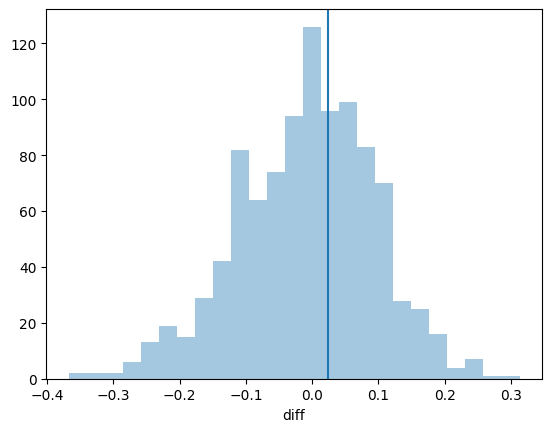

In [11]:
sns.distplot(perm_results['diff'], kde=False, norm_hist=False)
plt.axvline(diferencia_en_proporcion);

In [12]:
(perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0]

0.43

Ejemplo 2

In [13]:
import pandas as pd
import re
df = pd.read_json('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [14]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [15]:
grouped_by_title[grouped_by_title.str.contains('woman', case=False)]

title
1Q84                      In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS    A pregnant woman shows up in Cedar Cove on Chr...
A CHANGE IN ALTITUDE      A young woman’s life is transformed by a mount...
A TURN IN THE ROAD        A middle-age woman takes a cross-country road ...
AN OBJECT OF BEAUTY       A young, beautiful and ambitious woman ruthles...
                                                ...                        
THIS BODY OF DEATH        Detective Thomas Lynley becomes involved when ...
THOSE IN PERIL            A private security agent battles pirates who h...
WHAT DOESN'T KILL YOU     A Hong Kong woman who works for the C.I.A. sea...
WHERE WE BELONG           A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS    A woman makes discoveries about her sister and...
Name: description, Length: 74, dtype: object

In [16]:
# Buscar la aparición de números del 0 al 9

grouped_by_title[grouped_by_title.str.contains('[0-9]')]

title
1Q84                          In 1980s Tokyo, a woman who punishes perpetrat...
2030                          In 2030, the young resent the elderly for drai...
A LESSON IN SECRETS           In the summer of 1932, Maisie Dobbs’s first as...
A MEMORY OF LIGHT             The 14th and final novel in the Wheel of Time ...
A MERCY                       In 17th-­century America, a slave mother urges...
                                                    ...                        
WAKING THE WITCH                 Book 11 of the Women of the Otherworld series.
WHERE WE BELONG               A woman’s successful life is disrupted by the ...
WHERE'D YOU GO, BERNADETTE    A renowned and reclusive Seattle architect dis...
WHITE WITCH, BLACK CURSE      A witch who is also a bounty hunter avenges he...
WORST CASE                    A New York detective raising 10 children alone...
Name: description, Length: 123, dtype: object

In [17]:
# Uno o más números seguidos por una o más letras

grouped_by_title[grouped_by_title.str.contains('[0-9]+[a-z]+', case=False)]

title
1Q84                                        In 1980s Tokyo, a woman who punishes perpetrat...
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ANOTHER PIECE OF MY HEART                   A woman in her late 30s marries the man of her...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DARK STORM                                  In the 23r

In [18]:
# Uno o más números seguidos por las letras 'th'

grouped_by_title[grouped_by_title.str.contains('[0-9]th', case=False)]

title
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DAYS OF GOLD                                In the 18th century, Edilean and a Scottish la...
FLIRT                                       Anita Blake, vampire hunter, and the males in ...
ISLAND BENEATH THE SEA                      The story 

In [19]:
# Textos que comiencen con la palabra 'After'

grouped_by_title[grouped_by_title.str.contains('^After', case=False)]

title
DON’T BLINK                        After a gruesome murder in a New York steak ho...
FATAL ERROR                        After the murder of a cyber-sociopath, Ali Rey...
FOUNDERS                           After society collapses, America’s fate is in ...
RAPTURE                            After a man stumbles in front of the reporter ...
STANDING IN ANOTHER MAN'S GRAVE    After retiring from the Edinburgh police force...
THE DOG STARS                      After a flu pandemic kills most of the populat...
THE MAGICIANS                      After sorcery college, a young man lives the h...
WINTER GARDEN                      After their father’s death, two sisters must c...
Name: description, dtype: object

In [20]:
# Textos que terminen con la palabra 'London' y un punto (.)

grouped_by_title[grouped_by_title.str.contains('London.$', case=False)]

title
A DEVIL IS WAITING        Sean Dillon helps to foil a plot to assassinat...
A WALLFLOWER CHRISTMAS                     Matchmaking in Victorian London.
HER FEARFUL SYMMETRY      A woman haunts the flat she’s left to her twin...
Name: description, dtype: object

In [21]:
# Textos que contengan la palabra 'cat' o 'dog'

grouped_by_title[grouped_by_title.str.contains('\scat\s|\sdog\s', case=False)]

title
A DOG’S JOURNEY    In a sequel to “A Dog’s Purpose,” Buddy the do...
DARK SUMMER        A veterinarian cares for an injured dog with a...
Name: description, dtype: object

In [22]:
# Textos que contengan las palabras 'man' y/o 'woman' en singular y plural

grouped_by_title[grouped_by_title.str.contains('wom[ae]n|m[ae]n', case=False)]

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS      A pregnant woman shows up in Cedar Cove on Chr...
                                                  ...                        
WHERE WE BELONG             A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS      A woman makes discoveries about her sister and...
WICKED APPETITE             A dangerous man needs Elizabeth Tucker’s help ...
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
Name: description, Length: 197, dtype: object

In [23]:
# Podemos también reemplazar todos los caracteres que no sean ni alfanuméricos ni espacios o tabs por espacios vacíos
# Esto nos va a ser muy útil más adelante

grouped_by_title.str.replace('[^\w\s]', '')

<ipython-input-23-efec3fe2e901>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title.str.replace('[^\w\s]', '')


title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Womens Murder ...
11TH HOUR                   Detective Lindsay Boxer and the Womens Murder ...
1225 CHRISTMAS TREE LANE    Puppies and an exhusband loom large in the las...
1356                        In the fourth book of the Grail Quest series t...
1Q84                        In 1980s Tokyo a woman who punishes perpetrato...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F Scot...
ZERO DAY                        A military investigator uncovers a conspiracy
ZERO HISTORY                Several characters from Spook Country return t...
ZONE ONE                        Fighting zombies in postapocalyptic Manhattan
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [24]:
# Podemos también reemplazar todos los caracteres numéricos por espacios vacíos

grouped_by_title.str.replace('\d','')

<ipython-input-24-a07c58aa821b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title.str.replace('\d','')


title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In s Tokyo, a woman who punishes perpetrators ...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Ejemplo 3

In [25]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_json('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [26]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [27]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-27-7b19dfa1992e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-27-7b19dfa1992e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-27-7b19dfa1992e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
# Separamos cada oración en palabras
tokenized = grouped_by_title.apply(nltk.word_tokenize)
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [30]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# Creamos un objeto Text

all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: detective lindsay boxer and the womens murder club...>

In [31]:
text.concordance('woman', lines=20)

Displaying 20 of 60 matches:
 the battle of poitiers in s tokyo a woman who punishes perpetrators of domesti
of mishandling an autopsy a pregnant woman shows up in cedar cove on christmas 
e nothing is as it seems a middleage woman takes a crosscountry road trip with 
ment a young beautiful and ambitious woman ruthlessly ascends the heights of th
ring of humans and heavenly beings a woman in her late s marries the man of her
e ichidian universe a smuggler and a woman warrior must fight together to survi
paloosa trilogy two lawmen protect a woman one of them loves in frenchs fourth 
e an arcane society novel a southern woman is forever changed by the betrayals 
illipss earlier novels reappear as a woman persuades a friend to call off her w
plot to kill thousands of citizens a woman asks the boston detective dd warren 
arker in pursuing a dangerous case a woman joins with her estranged former step
texas fbi agent falls in love with a woman with a past lara callandine an exper
 wealthy co

In [32]:
# similar te regresa las palabras que aparecen en contextos similares al argumento

text.similar('woman')

man widow killer series war case doctor yearold friend boy target
yacht murder nanny group secret witch massacre mystery family


In [33]:
text.similar('women')

murder war love crimes killer battle resent administration eve life
recovery night state summer eyes wheel mother daughter author secrets


In [34]:
text.concordance('man', lines=20)

Displaying 20 of 35 matches:
ngs a woman in her late s marries the man of her dreams and reaches out to his 
tar hides his male lover a former hit man for the mob who has become a doctor i
y the betrayals of her mother and the man she loves intrigue on the planet safe
a in two agents are tracking the same man a human trafficker who is now dealing
lorida for a missing girl and the con man who seduced her a runaway girl and th
s deployed to iraq a distraught young man discovers that he has grown horns a s
 empire of charis fights to survive a man who kidnapped a yearold girl contacts
and cia stand in his way when a young man finds a bag of diamonds he gets the a
stigator maisie dobbs helps an indian man whose sisters murder has been ignored
al attacks a woman her daughter and a man accused of murder evade the authoriti
ooper becomes involved when a wealthy man assaults a maid in a manhattan hotel 
d as christmas nears a terminally ill man is preparing his family for his death
n involved 

In [35]:
text.similar('man')

killer woman widow murder war mystery case yearold vampire
disappearance target murderer yacht priest detective baby series
battle administration eve


In [36]:
text.similar('men')

s french president west truth culprit males governor


In [37]:
# common_contexts regresa los contextos que comparten dos o más palabras

text.common_contexts(['woman', 'man'])

a_in a_with a_who


In [38]:
# Total de palabras

len(text)

12569

In [39]:
# Total de palabras distintas

len(set(text))

3161

In [40]:
# Cuantificando la riqueza léxica

len(set(text)) / len(text)

0.2514917654546901

In [41]:
# Las colocaciones son pares de palabras (bigramas) que son inusualmente comunes en nuestro conjunto de datos
nltk.download('stopwords')
text.collocations()

new york; serial killer; stone barrington; los angeles; writing
pseudonymously; nora roberts; roberts writing; eve dallas; sookie
stackhouse; anita blake; dagger brotherhood; doc ford; jason bourne;
lacey sherlock; mitch rapp; temperance brennan; forensic sculptor;
alex cross; robert ludlums; san francisco


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Ejemplo 4

In [42]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_json('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [43]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [44]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-44-7b19dfa1992e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-44-7b19dfa1992e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-44-7b19dfa1992e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [45]:
# Separamos cada oración en palabras

tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [46]:
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [47]:
all_words = tokenized.sum()

In [48]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 3161 samples and 12569 outcomes>


In [49]:
freq_dist.most_common(50)

[('a', 917),
 ('the', 778),
 ('of', 417),
 ('in', 364),
 ('to', 283),
 ('and', 280),
 ('an', 149),
 ('her', 137),
 ('is', 127),
 ('his', 123),
 ('who', 107),
 ('for', 102),
 ('with', 93),
 ('on', 71),
 ('from', 70),
 ('by', 68),
 ('series', 61),
 ('new', 61),
 ('woman', 60),
 ('that', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('when', 46),
 ('as', 42),
 ('killer', 41),
 ('at', 40),
 ('must', 39),
 ('has', 38),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('she', 31),
 ('about', 30),
 ('their', 29),
 ('are', 28),
 ('war', 27),
 ('after', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('this', 24),
 ('agent', 24),
 ('into', 23),
 ('he', 23)]

In [50]:
from nltk.corpus import stopwords

In [51]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [52]:
freq_dist_no_stop_words.most_common(50)

[('series', 61),
 ('new', 61),
 ('woman', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('killer', 41),
 ('must', 39),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('war', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('agent', 24),
 ('cia', 22),
 ('love', 22),
 ('secret', 21),
 ('discovers', 21),
 ('lawyer', 20),
 ('murdered', 20),
 ('finds', 20),
 ('eve', 19),
 ('th', 19),
 ('mother', 19),
 ('case', 19),
 ('women', 19),
 ('wife', 19),
 ('serial', 18),
 ('first', 18),
 ('secrets', 18),
 ('pursues', 18),
 ('investigator', 18),
 ('operative', 18),
 ('missing', 17),
 ('search', 17),
 ('searches', 17),
 ('help', 17),
 ('fbi', 17),
 ('stone', 17),
 ('years', 17),
 ('girl', 17),
 ('investigate', 16),
 ('one', 16)]

In [53]:
# Conteo de una palabra y porcentaje de aparición

print(f'{(100 * freq_dist_no_stop_words["woman"] / len(all_words_except_stop_words)):.3f}%')

0.786%


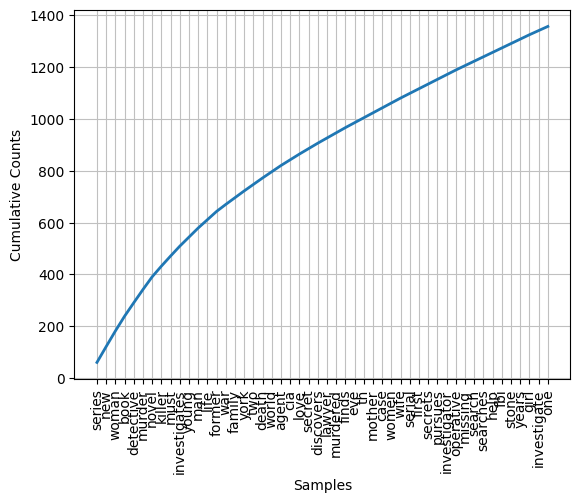

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [54]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes

freq_dist_no_stop_words.plot(50, cumulative=True)

In [55]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['puppies',
 'loom',
 'last',
 'grail',
 'poitiers',
 'tokyo',
 'punishes',
 'domestic',
 'aspiring',
 'resent',
 'draining',
 'weakening',
 'economy',
 'earthquake',
 'tests',
 'countrys',
 'jewish',
 'mishandling',
 'pregnant',
 'shows']

In [56]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0       disconcerting
1                cole
2                 nba
3               debts
4            lobbyist
            ...      
3060          choices
3061          fossils
3062      association
3063           sûreté
3064         suggests
Length: 3065, dtype: object

In [57]:
unique_series[unique_series.str.len() > 15]

70        dissatisfactions
172       singersongwriter
345      multigenerational
644       publicityseeking
739     turnofthethcentury
1779      postthanksgiving
1842      autobiographical
2012      mountainclimbing
2243     suicidebyaccident
2604      counterterrorism
dtype: object

In [58]:
# Palabras largas que son frecuentes

larger_than_10 = unique_series.str.len() > 7
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent]

44            involved
111     pseudonymously
131       investigator
328           assassin
420          terrorist
421          character
469          dangerous
515         characters
517          manhattan
645           daughter
750           american
770         barrington
1056     disappearance
1139       investigate
1151          forensic
1196         detective
1225        mysterious
1325         operative
1523          together
1539          reporter
1563          murdered
1851     investigation
2039          carolina
2402        paranormal
2493        washington
2667          searches
2827         discovers
2982         daughters
3009          intrigue
3028      investigates
dtype: object

In [59]:
# Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [60]:
freq_dist_lengths.most_common()

[(5, 1382),
 (6, 1364),
 (7, 1212),
 (4, 1051),
 (8, 707),
 (9, 586),
 (3, 471),
 (10, 354),
 (11, 164),
 (12, 157),
 (2, 60),
 (13, 60),
 (14, 30),
 (16, 11),
 (15, 11),
 (1, 8),
 (17, 2),
 (18, 1)]

In [61]:
freq_dist_lengths.max()

5

In [62]:
freq_dist_lengths[5]

1382

In [63]:
# También podemos saber qué proporción del total de palabras tiene longitud de 5

freq_dist_lengths.freq(5)

0.18110339405058315

Ejemplo 5

In [79]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
df = pd.read_json('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [80]:
df['rank.numberInt'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14,  1, 11, 15, 16])

In [87]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

<ipython-input-87-7cc00578ceb0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '');
<ipython-input-87-7cc00578ceb0>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '');
<ipython-input-87-7cc00578ceb0>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '');


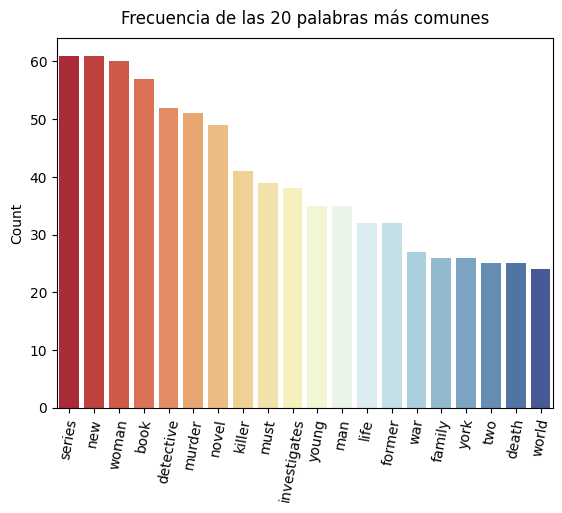

In [98]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

#sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
sns.barplot(x = most_common_20[:, 0], y = most_common_20[:, 1].astype(int), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

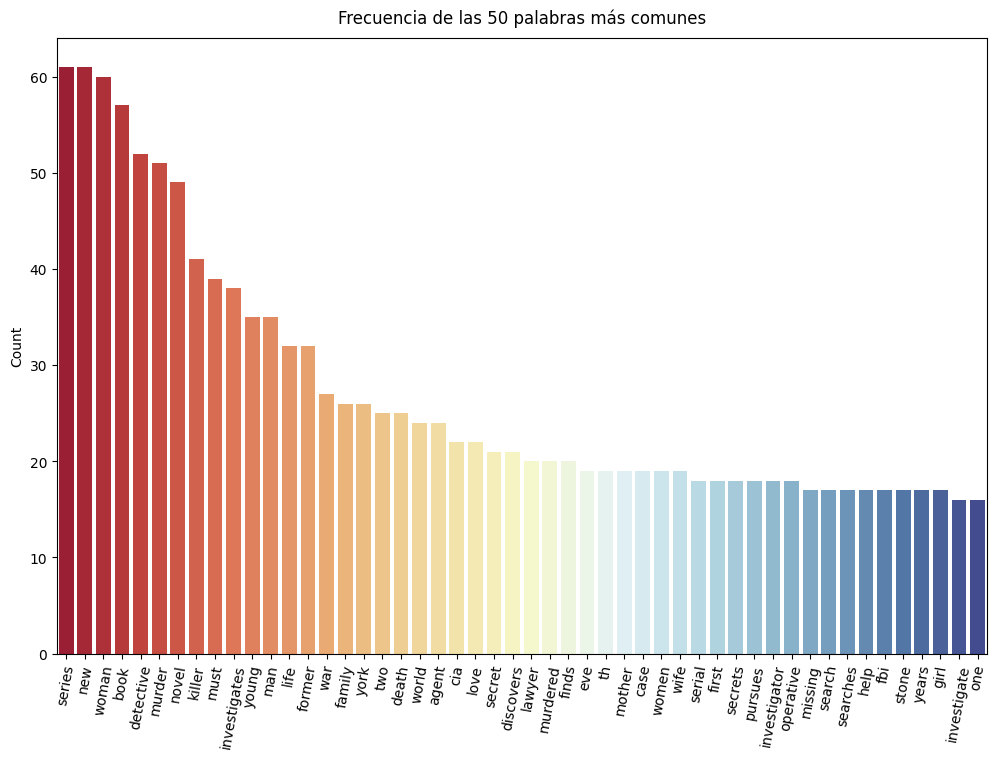

In [114]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()

#sns.barplot(most_common_50[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
sns.barplot(x = most_common_50[:, 0], y = most_common_50[:, 1].astype(int), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

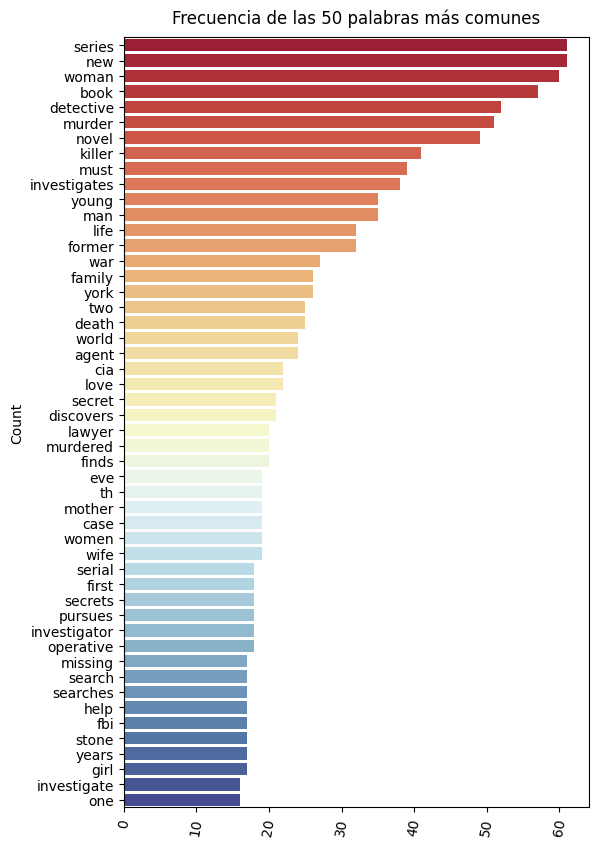

In [111]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6,10))
ax = fig.add_subplot()

#sns.barplot(most_common_50[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
sns.barplot(y = most_common_50[:, 0], x = most_common_50[:, 1].astype(int), ax=ax, palette='RdYlBu', orient="h");
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [115]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('of', 'the'): 105, ('in', 'the'): 99, ('of', 'a'): 93, ('in', 'a'): 61, ('and', 'a'): 38, ('a', 'woman'): 34, ('book', 'of'): 33, ('for', 'the'): 32, ('to', 'the'): 31, ('and', 'the'): 30, ...})

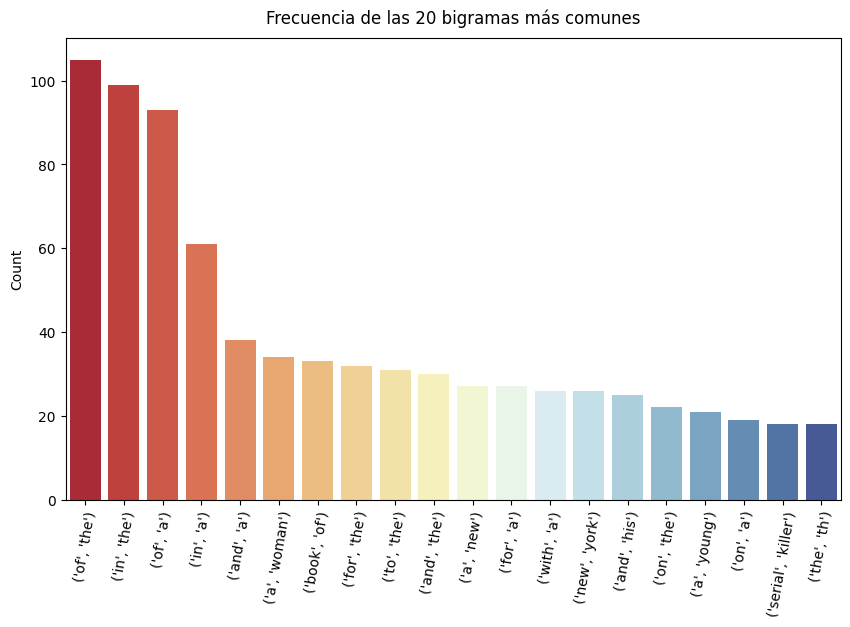

In [117]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x= most_common_20[:, 0], y= most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [118]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('new', 'york'): 26, ('serial', 'killer'): 18, ('stone', 'barrington'): 12, ('los', 'angeles'): 10, ('eve', 'dallas'): 10, ('writing', 'pseudonymously'): 10, ('lt', 'eve'): 9, ('nora', 'roberts'): 9, ('roberts', 'writing'): 9, ('fbi', 'agent'): 8, ...})

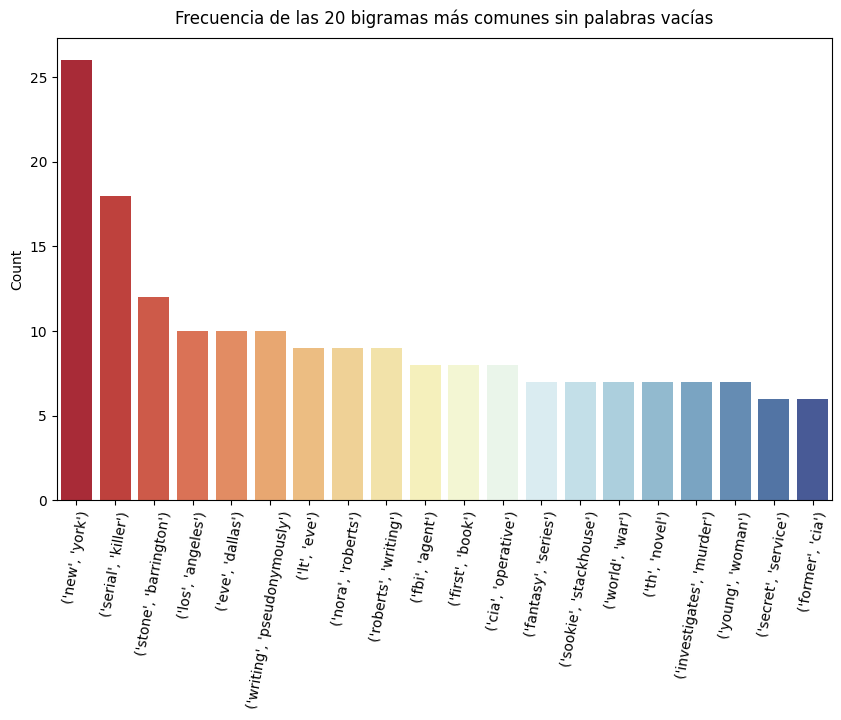

In [120]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x= most_common_20[:, 0], y= most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [121]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

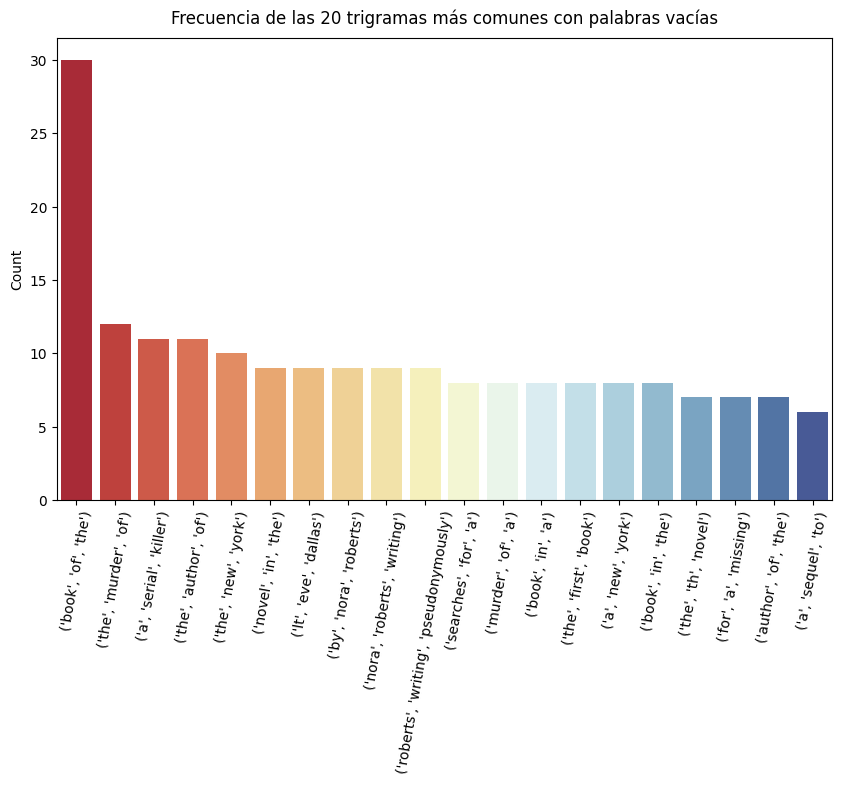

In [123]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x= most_common_20[:, 0], y= most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

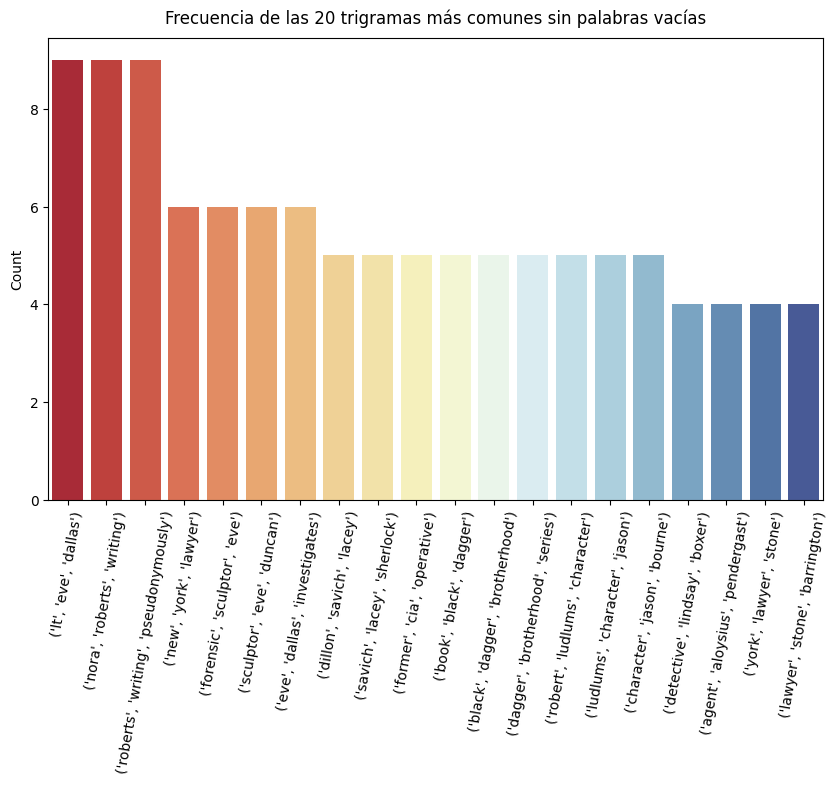

In [125]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x= most_common_20[:, 0], y= most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [126]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

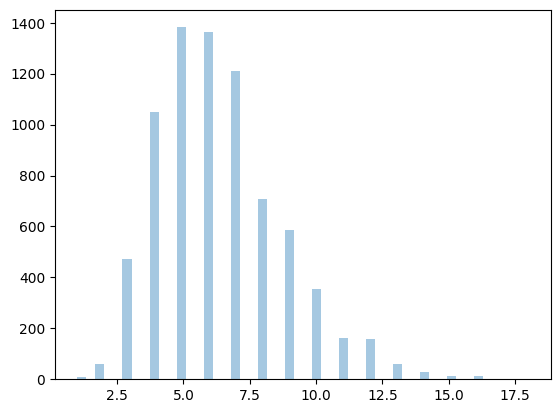

In [127]:
sns.distplot(word_lengths, kde=False, norm_hist=False);

In [128]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

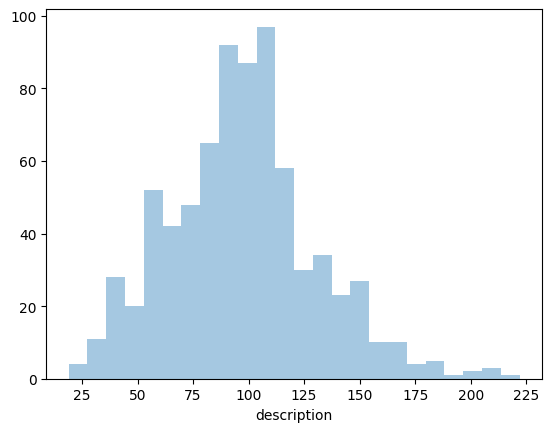

In [129]:
sns.distplot(sentence_lengths, kde=False, norm_hist=False);

In [130]:
num_of_words = grouped_by_title.str.split(' ').str.len()

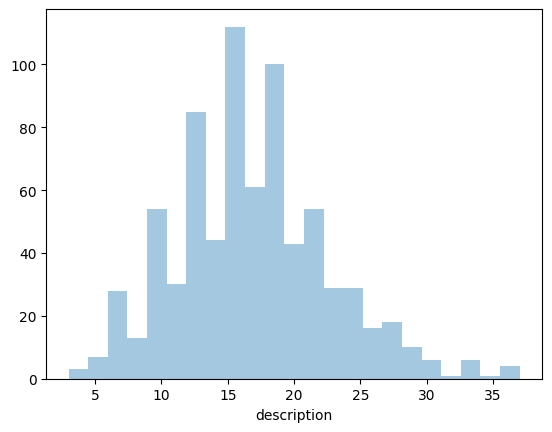

In [131]:
sns.distplot(num_of_words, kde=False, norm_hist=False);

In [132]:
from wordcloud import WordCloud

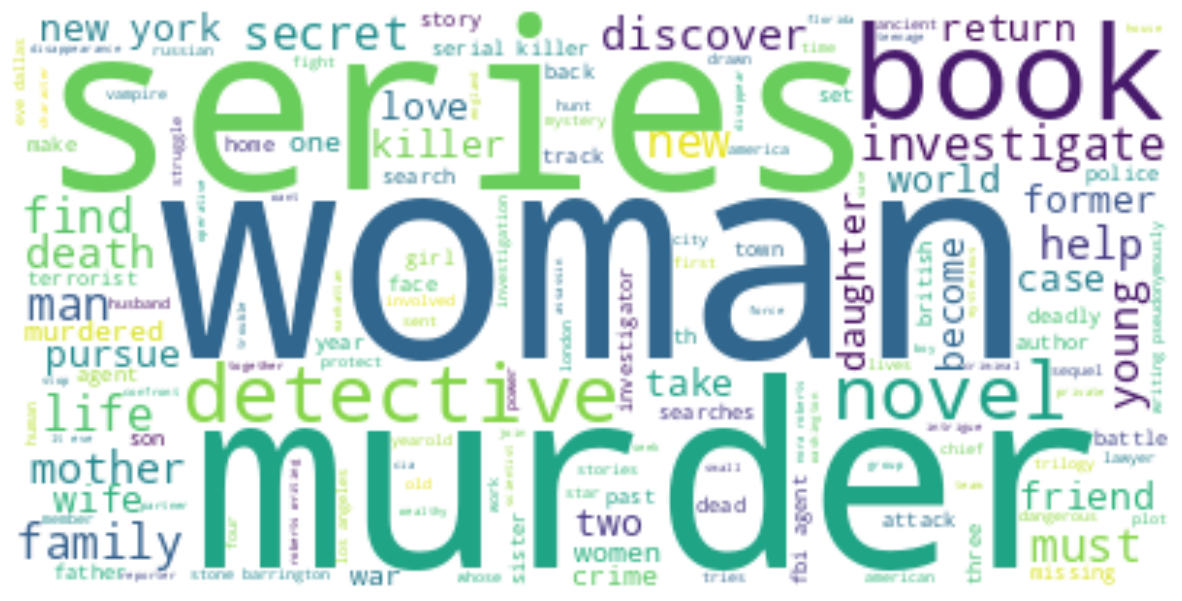

In [133]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()